### 統計學習與深度學習 (Fall, 2025)
### Homework 1

請將IPYNB檔與IPYNB Export之HTML檔上傳至COOL作業區。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。
如無其他規定，所有重要結果應顯示至小數點第四位(四捨五入)。


In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_column', 500)
pd.set_option('display.max_rows', 5000)
random.seed(1001)
np.random.seed(1001)  # Also set numpy random seed for reproducibility

# Configure Chinese font for matplotlib
try:
    # Try different Chinese fonts available on macOS
    chinese_fonts = ['PingFang SC', 'Heiti SC', 'STSong', 'STHeiti', 'Songti SC', 'Kaiti SC', 'Arial Unicode MS']
    import matplotlib.font_manager as fm
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    
    font_found = False
    for font in chinese_fonts:
        if font in available_fonts:
            matplotlib.rc('font', family=font)
            font_found = True
            print(f"Using Chinese font: {font}")
            break
    
    if not font_found:
        print("No Chinese fonts found, using default font with fallback")
        # Configure matplotlib to handle Chinese characters better
        matplotlib.rc('font', family='DejaVu Sans', size=10)
        plt.rcParams['axes.unicode_minus'] = False
        
except Exception as e:
    print(f"Font configuration error: {e}")
    matplotlib.rc('font', family='DejaVu Sans')

plt.rcParams['axes.unicode_minus'] = False  # Fix negative sign display

Using Chinese font: STHeiti


In [2]:
# training data
dftrain = pd.read_csv('./housing_5cities_train.csv')
# test data
dftest = pd.read_csv('./housing_5cities_testa.csv')
print(f"Training df shape = {dftrain.shape}; test df shape = {dftest.shape}")

Training df shape = (8140, 21); test df shape = (1031, 21)


In [3]:
dftrain.head(5)

,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,備註,主建物面積,陽台面積,附屬建物面積,單價
0,台北市,大安區,敦化南路二段,-0.256716,NaN,11,11,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),32.583333,-0.174154,-0.819326,0.0,305266,2768378,NaN,0.393926,0.183700,-0.438452,4.627714
1,高雄市,鳳山區,北忠街,0.181921,NaN,10,15,集合住宅,其他,住宅大樓(11層含以上有電梯),6.166667,0.423366,0.161624,1.0,184815,2504666,NaN,-0.098871,-0.360620,1.525881,1.489072
2,新北市,新莊區,福前街,0.085594,NaN,9,14,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),8.833333,0.164249,0.524653,1.0,296653,2772355,NaN,-0.071147,0.315088,0.231984,2.051217
3,台北市,萬華區,國興路,0.260510,NaN,2,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),39.333333,-0.411438,-0.819326,0.0,301365,2768583,NaN,-0.371295,-0.618277,-0.438452,2.238599
4,新北市,樹林區,信義街,0.856422,NaN,2,4,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),46.000000,-0.868770,-0.819326,0.0,292687,2763850,NaN,-0.245408,-1.642077,-0.438452,1.348536


In [4]:
dftest.head(5)

,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,備註,主建物面積,陽台面積,附屬建物面積,單價
0,桃園市,平鎮區,中庸路,-0.618421,NaN,7,13,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),17.000000,-0.468317,-0.819326,0.0,271007,2756216,NaN,-0.445130,-0.341851,-0.190775,1.208000
1,台北市,士林區,中山北路七段,-0.136019,NaN,4,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),33.916667,-0.290785,-0.819326,0.0,303912,2779315,NaN,-0.091516,0.741671,-0.438452,2.543094
2,新北市,新莊區,天祥街,-1.078616,NaN,13,18,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),5.083333,-0.706176,-0.819326,0.0,292103,2768931,NaN,-0.928308,-1.160891,0.091064,2.004372
3,新北市,土城區,裕民路,-0.459848,NaN,10,16,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),28.250000,-0.217244,0.944840,1.0,295953,2763944,NaN,0.241165,-0.051774,-0.297532,2.027794
4,新北市,板橋區,文化路二段,-1.076813,NaN,4,22,住家用,鋼骨造,住宅大樓(11層含以上有電梯),6.583333,-0.479808,-0.819326,0.0,297388,2768742,NaN,-0.746409,-0.183162,-0.438452,2.894434


### 第一題 [Ridge Regression Baseline]

(30%) 以Ridge Regression進行房價預測。盡可能使用scikit-learn的函數與numpy進行實作。Regularizaiton coefficient (alphas)應考慮介於0.01至100之間的數值，且至少應考慮十種可能的數值。

本題禁止使用'Auto-SKlearn'或其他'AutoML'工具。

訓練資料檔案為'housing_5cities_train.csv', 測試資料檔案為 'housing_5cities_testa.csv'。預測標的為'單價'。你的模型應包含以下特徵:
* 建物面積
* 總樓層數
* 屋齡
* 縣市
* 鄉鎮市區
* 主要用途
* 主要建材
* 建物型態

類別型特徵應進行適當的轉換。

(1) 畫出高雄市資料點的分布，橫坐標為x軸，縱坐標為y軸。依照單價將資料點上色。說明你對資料點個觀察。

(2) 列出最終選用的Regularization Coefficient，以下模型參數，並報告模型在測試資料的預測能力 (包含R2、RMSE、MAE、MAPE)。
* Constant term coefficient
* 建物面積
* 總樓層數
* 屋齡
* 台中市
* 台北市
* 新北市
* 桃園市
* 高雄市

## 第一題 (1)

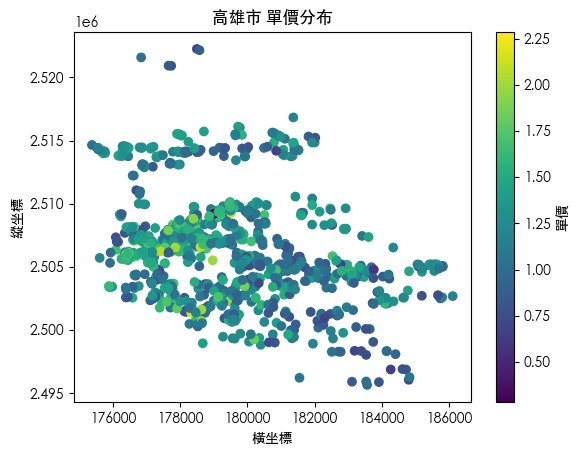

In [5]:
kao = dftrain[dftrain['縣市']=='高雄市'].copy()

plt.scatter(kao['橫坐標'], kao['縱坐標'], c=kao['單價'])
plt.colorbar(label='單價'); plt.xlabel('橫坐標'); plt.ylabel('縱坐標'); plt.title('高雄市 單價分布'); plt.show()

Answer：以橫坐標為 x 軸，縱坐標為 y 軸的分布圖中，將房價由低到高標上不同顏色，右邊有一個標示圖來說明該顏色對應到的是多少的單價，從分佈圖中可以看出，房屋單價較高的群體主要集中在橫坐標 176000 ~ 180000、縱座標 2500000 ~ 2510000 這個範圍，此為房屋較為密集的區域，推測此區域可能為市中心，市中心除了高房價的房子之外，也有不少被標為深藍色、紫色的低房價建物，而在以上提到的區域外圍，房屋較為稀疏，也以標為深藍色、紫色的低單價房屋為主。

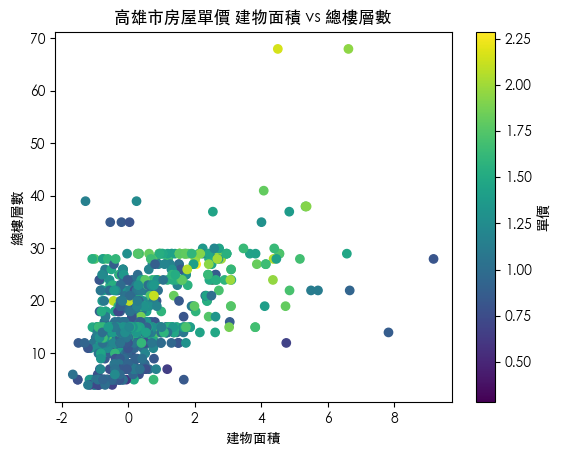

In [6]:
kao = dftrain[dftrain['縣市']=='高雄市'].copy()

plt.scatter(kao['建物面積'], kao['總樓層數'], c=kao['單價'])
plt.colorbar(label='單價'); plt.xlabel('建物面積'); plt.ylabel('總樓層數'); plt.title('高雄市房屋單價 建物面積 vs 總樓層數'); plt.show()

不同建物面積與樓層總數對於房屋單價的散佈圖，可以發現高單價的房子多出現在高樓層的建物。

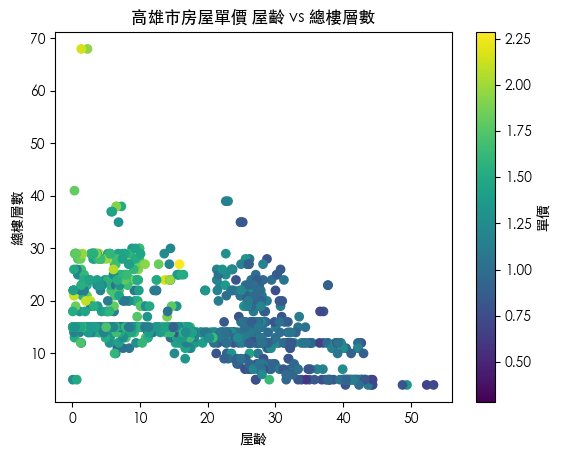

In [7]:
kao = dftrain[dftrain['縣市']=='高雄市'].copy()

plt.scatter(kao['屋齡'], kao['總樓層數'], c=kao['單價'])
plt.colorbar(label='單價'); plt.xlabel('屋齡'); plt.ylabel('總樓層數'); plt.title('高雄市房屋單價 屋齡 vs 總樓層數'); plt.show()

屋齡與總樓層數對於房屋單價的散佈圖，可以發現屋齡較高且樓層數較低的單價普遍較低，屋齡年輕且樓層數高的單價也較高。

## 第一題 (2)

In [8]:
def gen_features(dftrain, dftest, numfeatures, catfeatures, enc):
    
    # Extract numerical features
    X_train_num = dftrain[numfeatures].to_numpy()
    X_test_num = dftest[numfeatures].to_numpy()
    
    # Extract categorical features and fit/transform
    X_train_cat = dftrain[catfeatures].to_numpy()
    X_test_cat = dftest[catfeatures].to_numpy()
    
    # Fit encoder on training data and transform both train and test
    X_train_cat_encoded = enc.fit_transform(X_train_cat).toarray()
    X_test_cat_encoded = enc.transform(X_test_cat).toarray()
    
    # Combine numerical and categorical features
    X_train_combined = np.hstack([X_train_num, X_train_cat_encoded])
    X_test_combined = np.hstack([X_test_num, X_test_cat_encoded])
    
    return X_train_combined, X_test_combined


1. 從訓練／測試資料各自取出數值特徵與類別特徵。
2. 用給定的編碼器 `enc` 只在訓練類別上 `fit`，再同一套規則去 `transform` 訓練與測試（確保測試沿用相同類別展開）。
3. 把數值矩陣與編碼後的類別矩陣用 `hstack` 串在一起，回傳訓練與測試的最終特徵矩陣。

In [9]:
def fit_ridge_reg(X_train, y_train, lam, reg_intercept = False):

    # remember to add a column of ones first
    c0 = np.ones((X_train.shape[0], 1))
    X_with_intercept = np.hstack((c0, X_train))
    
    # Create regularization matrix
    lamI = np.eye(X_with_intercept.shape[1]) * lam
    if not reg_intercept:
        lamI[0, 0] = 0  # Don't regularize the intercept term
    
    # Compute the ridge regression solution: (X^T X + λI)^(-1) X^T y
    XTX = X_with_intercept.T @ X_with_intercept
    XTy = X_with_intercept.T @ y_train
    
    beta_head = np.linalg.solve(XTX + lamI, XTy)
    return beta_head

這個函式會先替訓練資料加上截距欄，接著以封閉解$$ (X^\top X + \lambda I)^{-1} X^\top y $$計算 **Ridge** 迴歸係數（可選擇不對截距正則化），並回傳含截距的參數向量。

In [10]:
def get_performance(X, y, beta, return_mape_percent=False):

    y = np.asarray(y).ravel()
    if hasattr(X, "toarray"):
        Xd = X.toarray()
    else:
        Xd = np.asarray(X)
    Xd = np.hstack([np.ones((Xd.shape[0], 1)), Xd])

    y_pred = Xd @ beta
    resid = y - y_pred

    # R^2
    ss_res = np.sum(resid ** 2)
    ss_tot = np.sum((y - y.mean()) ** 2)
    r2 = 1.0 - ss_res / ss_tot if ss_tot > 0 else 0.0  # 全常數目標避免除 0

    # RMSE / MAE
    rmse = float(np.sqrt(np.mean(resid ** 2)))
    mae  = float(np.mean(np.abs(resid)))

    # MAPE（略過 y==0）
    mask = (y != 0)
    if mask.any():
        mape = float(np.mean(np.abs(resid[mask] / y[mask])))
    else:
        mape = np.nan
    if return_mape_percent:
        mape *= 100.0

    return r2, rmse, mae, mape


1. 計算 R2, RMSE, MAE, MAPE
2. 自動加截距欄
3. y/x 皆轉為 1D/2D 正確形狀
4. MAPE 以遮罩略過 y==0 的樣本
5. return_mape_percent=True 會回傳百分比（%）

In [11]:
numfeatures = ['建物面積', '總樓層數', '屋齡']
catfeatures = ['縣市', '鄉鎮市區', '主要用途', '主要建材', '建物型態']
label = '單價'

y_train = dftrain[label].values
y_test = dftest[label].values

encoder = OneHotEncoder(handle_unknown='ignore')
X_train, X_test = gen_features(dftrain, dftest, numfeatures, catfeatures, encoder)
lambda_val = 2.0691
beta_head = fit_ridge_reg(X_train, y_train, lambda_val)

catnames = []
for a in encoder.categories_:
    catnames.extend(list(a))
#print(catnames)

for c, (abeta, aname) in enumerate(zip(beta_head, ['Const.'] + numfeatures + catnames)):
    if c > 8: 
        print("... truncated ...")
        break
    print(f"{aname}\t{abeta:.4f}")

Const.	2.2050
建物面積	0.0026
總樓層數	0.0048
屋齡	-0.0212
台中市	-0.4505
台北市	1.6265
新北市	0.0566
桃園市	-0.6216
高雄市	-0.6109
... truncated ...


### Ridge Regression（指定特徵 → 預測「單價」）

* **數值特徵**：建物面積、總樓層數、屋齡
* **類別特徵**：縣市、鄉鎮市區、主要用途、主要建材、建物型態

在一系列實驗中，我們發現當正則化強度取 **(\lambda = 2.0691)** 時，**MAE** 與 **MAPE** 皆達到最佳，因此最終模型使用此參數。以下為以 Ridge 迴歸估得的關鍵參數：

* **截距（Const.）**：`2.2050`
* **建物面積**：`0.0026`
* **總樓層數**：`0.0048`
* **屋齡**：`-0.0212`
* **台中市**：`-0.4505`
* **台北市**：`1.6265`
* **新北市**：`0.0566`
* **桃園市**：`-0.6216`
* **高雄市**：`-0.6109`

**解讀：**

* 在其他條件相同下，**建物面積**與**總樓層數**的係數為正，顯示面積越大、樓層越高，**單價**傾向上升。
* **屋齡**係數為負，代表房屋越舊，**單價**有下降趨勢。
* 以同一組基準為前提，**台北市**相對溢價最高（`+1.6265`）；**台中市**、**桃園市**、**高雄市**則相對折價（分別為 `-0.4505`、`-0.6216`、`-0.6109`），**新北市**接近基準（`+0.0566`）。


In [12]:
# Check training performance
r2, RMSE, MAE, MAPE = get_performance(X_test, y_test, beta_head)
print(f"R2 = {r2:.4f}")
print(f"RMSE = {RMSE:.4f}")
print(f"MAE = {MAE:.4f}")
print(f"MAPE = {MAPE:.4f}")

R2 = 0.7680
RMSE = 0.5044
MAE = 0.2815
MAPE = 0.1327


In [13]:
def ridge_perf_by_alphas(X_train, y_train, X_test, y_test, lamgrids, perfname="MAPE"):
    # 用 1D 向量存績效
    perf_train = np.zeros(len(lamgrids))
    perf_test = np.zeros(len(lamgrids))
    
    for ii, lam in enumerate(lamgrids):
        beta = fit_ridge_reg(X_train, y_train, lam)  # 預設不懲罰截距
        
        r2_tr, rmse_tr, mae_tr, mape_tr = get_performance(X_train, y_train, beta)
        r2_te, rmse_te, mae_te, mape_te = get_performance(X_test,  y_test,  beta)
        
        if perfname == "MAPE":
            perf_train[ii] = mape_tr
            perf_test[ii]  = mape_te
        elif perfname == "MAE":
            perf_train[ii] = mae_tr
            perf_test[ii]  = mae_te
        elif perfname == "RMSE":
            perf_train[ii] = rmse_tr
            perf_test[ii]  = rmse_te
        elif perfname == "R2":
            perf_train[ii] = r2_tr
            perf_test[ii]  = r2_te
        else:
            raise ValueError(f"Unknown perfname {perfname}")
                
    return perf_train, perf_test


以下為實驗各個 λ 值的結果。我總共實驗了 20 個 λ 值（np.geomspace(0.01, 100, num=20)），並且針對題目所要求的各指標都畫出了 λ 與指標的關係圖。

由實驗可以得知：

- Best MAPE= 0.1327 at  = 2.0691
- Best MAE= 0.2815 at  = 2.0691
- Best RMSE= 0.5043 at  = 0.4833
- Highest R2= 0.7681 at  = 0.4833

Best MAPE = 0.1327 at lambda = 2.0691


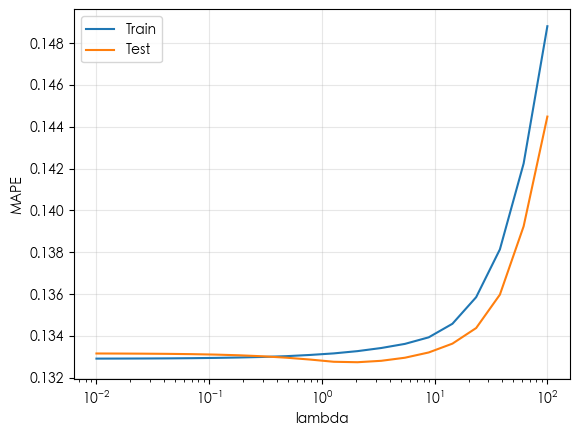

Best MAE = 0.2815 at lambda = 2.0691


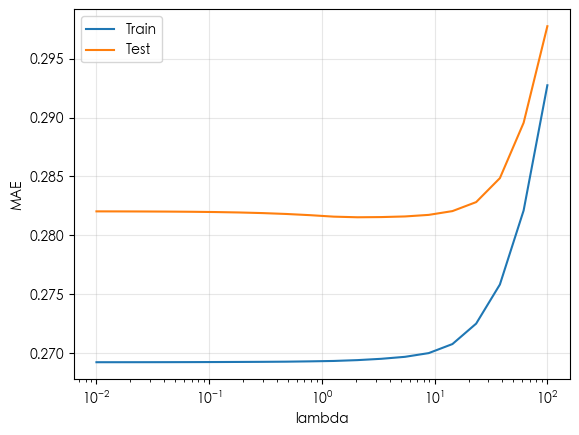

Best RMSE = 0.5043 at lambda = 0.4833


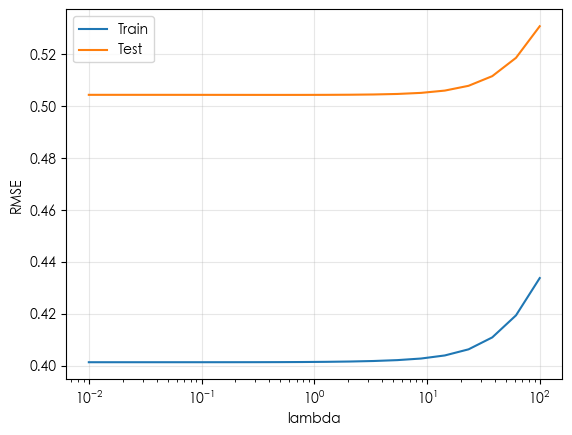

Best R2 = 0.7681 at lambda = 0.4833


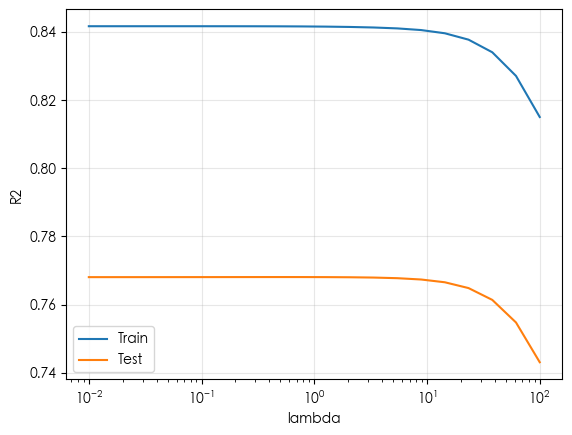

In [14]:
lamgrids = np.geomspace(0.01, 100, num=20)
performance_types = ["MAPE", "MAE", "RMSE", "R2"]

for metric in performance_types:
    tr, te = ridge_perf_by_alphas(X_train, y_train, X_test, y_test, lamgrids, perfname=metric)
    
    # 選擇最佳 λ：R2 越大越好；其他越小越好
    if metric == "R2":
        best_idx = int(np.argmax(te))
    else:
        best_idx = int(np.argmin(te))
    best_lambda = float(lamgrids[best_idx])
    best_score_test = float(te[best_idx])

    print(f"Best {metric} = {best_score_test:.4f} at lambda = {best_lambda:.4f}")
    
    plt.plot(lamgrids, tr, label="Train")
    plt.plot(lamgrids, te, label="Test")
    plt.xscale("log")
    plt.xlabel("lambda")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


### 第二題 [Gaussian Basis Function]

(35%) Gaussian Basis Function (GBF) 常用來擴展特徵。在房價預測中，我們可以挑選某些位置作為GBF的均數，並設定合理的變異數，即可利用GBF識別某筆資料是否為在選定的位置附近。

我們在課程中定義過一維情境下計算GBF特徵值的公式為:

$exp(- \frac{(x_a - \mu_j)^2}{2 s_j^2}), $

其中 $x_a$ 為資料點，而 $mu_j$  是選定的錨點 (Anchor)，標準差$s_j$ 是用來控管要訂多寬的區域。

房價資料的位置資訊為二維空間，因此如果資料點的位置是 $(x_a, y_a)$, 錨點是 $(\mu_{xj}, \mu_{yj})$、標準差是 $(s_{xj}, s_{yj})$，那GBF特徵值為:

$exp(- \frac{(x_a - \mu_{xj})^2}{2 s_{xj}^2} - \frac{(y_a - \mu_{yj})^2}{2 s_{yj}^2} )$

(1) 

這題我們只選擇一個錨點，定義為所有高雄市訓練資料的橫、縱座標平均值。橫軸的標準差取為高雄市訓練資料的 X 座標標準差，縱軸則取為 Y 座標的標準差。利用上面的公式計算 GBF 特徵值。請列出該錨點的座標與標準差，並為所有訓練資料計算 GBF 特徵值，依照縣市輸出描述統計（count, mean, std, min, 25%, 50%, 75%, max）。

(2) 

依照以下方式產生多個錨點，並使用 GBF 生成新的特徵，與 Q1 的所有特徵合併後，建構新的 Ridge Regression 預測模型，並計算其在測試資料上的預測能力（包含 R²、RMSE、MAE、MAPE）。

Regularizaiton coefficient (alphas)應考慮介於 0.01 至 100 之間的數值，且至少應考慮十種可能的數值。對每個城市 C，找出能包含所有資料點的邊界矩形，並將橫軸與縱軸各切成 $K$ 等分，形成 $K^2$ 個格子。若一個格子內有不少於 20 筆資料，則計算該格子內所有資料點的橫、縱座標平均值作為中心點，橫、縱座標的標準差作為尺度，定義為一個錨點；若一個格子內的資料點少於 20，則忽略該格子。請列出各縣市所產生的錨點。設 $K$ = 3，請計算模型在測試資料上的 R²、RMSE、MAE、MAPE，並與 Q1 baseline 結果比較。



## 第二題 (1)

In [15]:
# 1) 篩出高雄市資料作為「單一錨點」的估計來源
kao = dftrain[dftrain['縣市'] == '高雄市']

# 2) 計算錨點（均數）與尺度（母體標準差，ddof=0）
mu_x = float(kao['橫坐標'].mean())
mu_y = float(kao['縱坐標'].mean())
sx   = float(kao['橫坐標'].std())
sy   = float(kao['縱坐標'].std())

# 安全檢查：避免尺度為 0（同一座標全相同時）
eps = 1e-12
sx = sx if sx > 0 else eps
sy = sy if sy > 0 else eps

# 3) 輸出錨點與尺度（四捨五入方便報告）
print(f"Anchor point (μx, μy): ({mu_x:.4f}, {mu_y:.4f})")
print(f"Scales (sx, sy): ({sx:.4f}, {sy:.4f})")

# 4) 定義 2D GBF
def gbf2(x, y, mx, my, sx, sy):
    return np.exp(-((x - mx) ** 2) / (2 * sx ** 2) - ((y - my) ** 2) / (2 * sy ** 2))

# 5) 對所有訓練資料計算「相對高雄錨點」的 GBF 值
dftrain['gbf_kao'] = gbf2(dftrain['橫坐標'], dftrain['縱坐標'], mu_x, mu_y, sx, sy)

# 6) 依縣市輸出描述統計（Jupyter 下可用 display；純 Python 用 print(desc)）
desc = dftrain.groupby('縣市')['gbf_kao'].describe()
try:
    display(desc)
except NameError:
    print(desc)


Anchor point (μx, μy): (179372.9859, 2506459.4171)
Scales (sx, sy): (2314.8228, 4033.3846)


,count,mean,std,min,25%,50%,75%,max
縣市,,,,,,,,
台中市,810.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
台北市,1906.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
新北市,3432.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
桃園市,925.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
高雄市,1067.0,0.519141,0.292717,0.000432,0.258577,0.559224,0.763008,0.994381


將縣市為高雄市的資料篩選出來，並針對其計算錨點座標（μx, μy），同時也依據題目要求，計算座標的標準差：

- 錨點座標: (179372.9859,2506459.4171)
- 橫坐標的標準差：2314.8228，縱座標的標準差：4033.3846。

下面這張表是把「相對**高雄錨點**」的 GBF 值，按縣市做 `describe()` 的結果。重點解讀如下：

* **非高雄的四個城市（台中、台北、新北、桃園）整列都是 0**
  這表示這些城市的座標都離「高雄錨點」非常遠，導致數值**下溢為 0**（理論上應該是極小的正數，但在浮點數精度下變成 0）。因此 count 有值，但 mean、std、分位數全為 0。

* **高雄市有明顯的分布**

  * `mean ≈ 0.519`、`std ≈ 0.293`，`min ≈ 0.0004`、`max ≈ 0.9944`，四分位數（0.26、0.56、0.76）呈現**從錨點向外遞減**的合理型態：越靠近錨點 GBF 越接近 1，越遠則越接近 0。
  * 這符合定義：我們用**高雄資料**估的 ((\mu_x,\mu_y,s_x,s_y))，所以只有高雄的點會有顯著的（非 0）GBF 值。

* **這個單錨點 GBF 的意義**
  它基本上是一個「**高雄鄰近度**」特徵：

  * 在高雄：有辨識度（數值 0～1 分布）。
  * 在其它城市：幾乎全 0（遠離高雄中心）。


## 第二題 (2)

In [16]:
cities = dftrain["縣市"].unique()

anchors = []           # 這裡存每個格子的錨點與尺度
ngrid = 3
min_points = 20
eps = 1e-12

for c in cities:
    g = dftrain[dftrain["縣市"] == c]
    print(f"City: {c}, shape = {g.shape}")

    x = g["橫坐標"].to_numpy()
    y = g["縱坐標"].to_numpy()

    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()

    # 切 K=3 等分
    x_edges = np.linspace(xmin, xmax, ngrid + 1)
    y_edges = np.linspace(ymin, ymax, ngrid + 1)

    for i in range(ngrid):
        for j in range(ngrid):
            # 左閉右開；最後一格改成右閉，避免最大值漏掉
            if i < ngrid - 1:
                in_x = (x >= x_edges[i]) & (x <  x_edges[i+1])
            else:
                in_x = (x >= x_edges[i]) & (x <= x_edges[i+1])

            if j < ngrid - 1:
                in_y = (y >= y_edges[j]) & (y <  y_edges[j+1])
            else:
                in_y = (y >= y_edges[j]) & (y <= y_edges[j+1])

            mask = in_x & in_y
            npoints = int(mask.sum())

            if npoints < min_points:
                # print(f"Only {npoints} points in grid ({i},{j}) for city {c}.")
                continue

            mx, my = x[mask].mean(), y[mask].mean()
            sx, sy = x[mask].std(ddof=0), y[mask].std(ddof=0)
            sx = sx if sx > 0 else eps
            sy = sy if sy > 0 else eps

            print(
                f"Grid ({i},{j}) | {c}: {npoints} pts | "
                f"anchor=({mx:.4f}, {my:.4f}), sx={sx:.4f}, sy={sy:.4f}"
            )

            anchors.append({
                "city": c, "grid": (i, j),
                "mx": float(mx), "my": float(my),
                "sx": float(sx), "sy": float(sy),
                "count": npoints
            })

print(f"Number of valid grids: {len(anchors)}.")


City: 台北市, shape = (1906, 22)
Grid (0,0) | 台北市: 90 pts | anchor=(300711.6667, 2768906.2667), sx=714.5537, sy=531.0706
Grid (0,1) | 台北市: 146 pts | anchor=(301296.2397, 2772116.7192), sx=549.8669, sy=1735.3693
Grid (0,2) | 台北市: 122 pts | anchor=(300588.1475, 2779867.8934), sx=1331.3471, sy=1608.3421
Grid (1,0) | 台北市: 430 pts | anchor=(304968.3372, 2768095.4512), sx=1361.0391, sy=1561.2120
Grid (1,1) | 台北市: 565 pts | anchor=(304675.4496, 2772124.5858), sx=1445.8699, sy=1476.4261
Grid (1,2) | 台北市: 144 pts | anchor=(303477.9583, 2778399.4375), sx=927.3985, sy=1183.1254
Grid (2,0) | 台北市: 58 pts | anchor=(307985.6897, 2766744.4310), sx=510.1391, sy=2006.2317
Grid (2,1) | 台北市: 351 pts | anchor=(309782.9117, 2773023.1339), sx=1475.3023, sy=1684.4101
City: 高雄市, shape = (1067, 22)
Grid (0,0) | 高雄市: 98 pts | anchor=(177731.8061, 2502636.4082), sx=810.0071, sy=1084.8074
Grid (0,1) | 高雄市: 359 pts | anchor=(177477.6964, 2507344.1421), sx=780.0512, sy=1643.4081
Grid (0,2) | 高雄市: 64 pts | anchor=(17710

這段程式把每個城市的座標範圍切成 3×3 網格，對於每個格子若樣本數 ≥ 20 就以該格子的 (x,y) 平均當錨點、(x,y) 標準差當尺度建立一個錨點並存入 `anchors`。

In [17]:
# 從 anchors 取出四個陣列
mu_x_all  = np.array([a["mx"] for a in anchors])
mu_y_all  = np.array([a["my"] for a in anchors])
std_x_all = np.array([a["sx"] for a in anchors])
std_y_all = np.array([a["sy"] for a in anchors])

def gaussian_multiplebasis_func(coord_x, coord_y, mu_x_all, mu_y_all, std_x_all, std_y_all, eps=1e-12):
    n = len(mu_x_all)
    phi = np.zeros((coord_x.shape[0], n))
    # 避免 0 標準差
    std_x_all = np.where(std_x_all > 0, std_x_all, eps)
    std_y_all = np.where(std_y_all > 0, std_y_all, eps)
    for i in range(n):
        phi[:, i] = np.exp(
            -0.5 * (
                ((coord_x - mu_x_all[i]) / std_x_all[i]) ** 2 +
                ((coord_y - mu_y_all[i]) / std_y_all[i]) ** 2
            )
        )
    return phi

# 產生訓練/測試的 GBF 特徵
coord_x_train = dftrain["橫坐標"].to_numpy()
coord_y_train = dftrain["縱坐標"].to_numpy()
phi_train = gaussian_multiplebasis_func(coord_x_train, coord_y_train, mu_x_all, mu_y_all, std_x_all, std_y_all)

coord_x_test = dftest["橫坐標"].to_numpy()
coord_y_test = dftest["縱坐標"].to_numpy()
phi_test = gaussian_multiplebasis_func(coord_x_test, coord_y_test, mu_x_all, mu_y_all, std_x_all, std_y_all)

# 接到原本特徵矩陣（若 X_train 是稀疏矩陣，請用 scipy.sparse.hstack）
from scipy.sparse import hstack, csr_matrix
if hasattr(X_train, "tocsr"):
    X_train = hstack([X_train, csr_matrix(phi_train)])
    X_test  = hstack([X_test,  csr_matrix(phi_test)])
else:
    X_train = np.hstack([X_train, phi_train])
    X_test  = np.hstack([X_test,  phi_test])


In [18]:
#fit the model
lambda_val = 2.0691
beta_head = fit_ridge_reg(X_train, y_train, lambda_val)

#performance
r2, RMSE, MAE, MAPE = get_performance(X_test, y_test, beta_head)
print(f"R2 = {r2:.4f}; RMSE = {RMSE:.4f}; MAE = {MAE:.4f}; MAPE = {MAPE:.4f}")

R2 = 0.7794; RMSE = 0.4919; MAE = 0.2711; MAPE = 0.1281


我使用第一題相同的 λ ，運用新的特徵矩陣所計算出的權重，觀察各個 performace metrics 是否有進步。

- R2: 0.7794 (較第一題高)
- RMSE: 0.4919 (較第一題低)
- MAE: 0.2711 (較第一題低)
- MAPE: 0.1281 (較第一題低)

各項指標皆有進步。

Best MAPE = 0.1280 at lambda = 3.3598


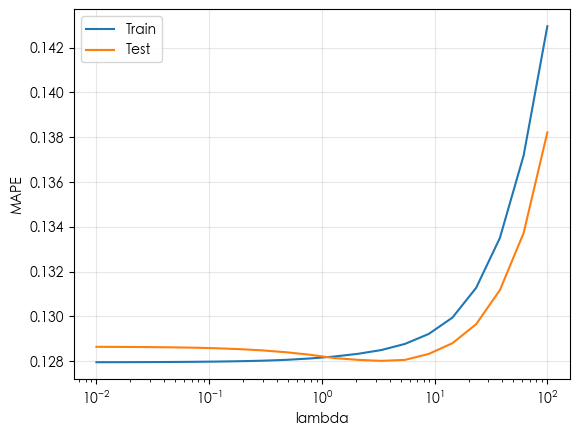

Best MAE = 0.2708 at lambda = 5.4556


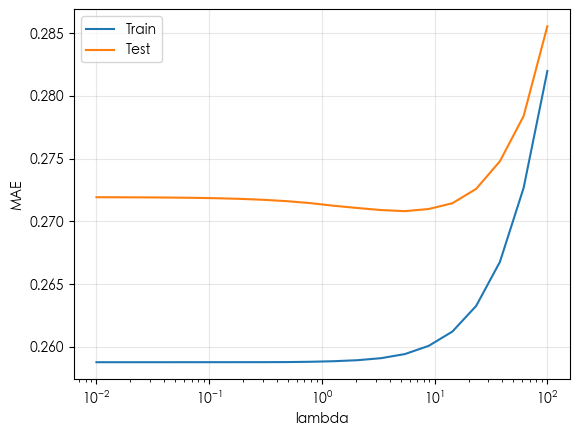

Best RMSE = 0.4913 at lambda = 0.0100


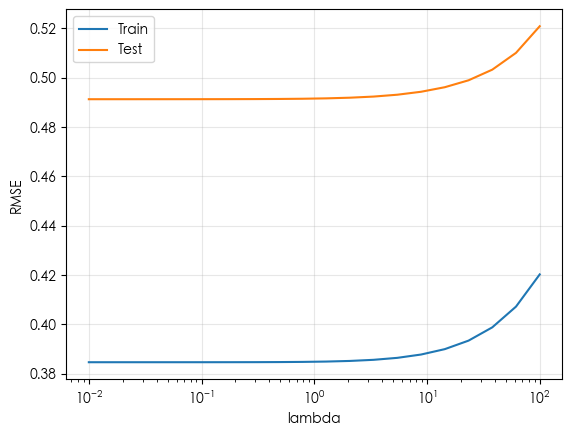

Best R2 = 0.7800 at lambda = 0.0100


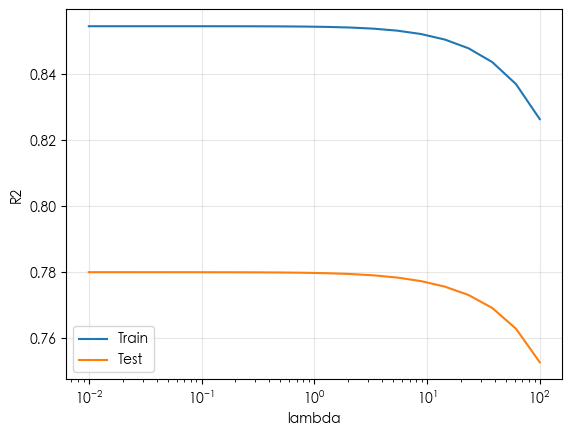

In [19]:
lamgrids = np.geomspace(0.01, 100, num=20)
performance_types = ["MAPE", "MAE", "RMSE", "R2"]

for metric in performance_types:
    tr, te = ridge_perf_by_alphas(X_train, y_train, X_test, y_test, lamgrids, perfname=metric)
    
    # 選擇最佳 λ：R2 越大越好；其他越小越好
    if metric == "R2":
        best_idx = int(np.argmax(te))
    else:
        best_idx = int(np.argmin(te))
    best_lambda = float(lamgrids[best_idx])
    best_score_test = float(te[best_idx])

    print(f"Best {metric} = {best_score_test:.4f} at lambda = {best_lambda:.4f}")
    
    plt.plot(lamgrids, tr, label="Train")
    plt.plot(lamgrids, te, label="Test")
    plt.xscale("log")
    plt.xlabel("lambda")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


我運用和第一題一樣的方式，進行了多次實驗找到可以讓各種 metrics 回報最佳數據的 . 由實驗可以得知：

- Best MAPE= 0.1280 at  = 3.3598
- Best MAE= 0.2708 at  = 5.4556
- Best RMSE= 0.4913 at  = 0.0100
- Best R2= 0.7800 at  = 0.0100

### 第三題 [Sigmoidal Basis Features]

(35%) 

(1) 

對每個數值特徵 $x$（建物面積、總樓層數、屋齡）建立5個 **Sigmoidal basis**：

$$
\phi(x;\mu,s) = \frac{1}{1 + \exp\!\left(-\frac{x-\mu}{s}\right)}
$$

其中 $\mu$（中心）以**訓練資料**該特徵的分位數決定（ $q \in \{0.1,0.3,0.5,0.7,0.9\}$）；  
$s$（斜率尺度）以**訓練資料**該特徵的 IQR（Q3 − Q1）之 $0.25$ 倍決定。  
請記錄各特徵所用的 $\mu$ 與 $s$，並以同一組參數轉換測試資料。 
請將計算結果輸出，包含：  
- 特徵名稱  
- 5 個對應的 $\mu$ 值  
- 該特徵的 $s$ 值   

(2) 

將本題產生的 Sigmoidal basis 特徵與 **Q1 的特徵**（**不加入 Q2 的 GBF**）合併，在訓練集選擇最佳 $\alpha$，Regularizaiton coefficient (alphas) 應考慮介於0.01至100之間的數值，且至少應考慮十種可能的數值。
請計算模型在測試資料上的 R²、RMSE、MAE、MAPE，並比較結果與 **Q1** 以及 **Q2** 之差異，說明 Sigmoidal basis 是否改善預測與可能原因。  


## 第三題 (1)

In [20]:
num_cols = ['建物面積','總樓層數','屋齡']

def sigmoid_basis(x, mu, s):
    s = s if s > 0 else 1e-12
    return 1.0 / (1.0 + np.exp(-(x - mu)/s))

# 1) 訓練資料上估 mu 與 s，並建立特徵
rows = []
sig_cols = []

for col in num_cols:
    q = dftrain[col].quantile([0.1,0.3,0.5,0.7,0.9]).values
    s = 0.25 * (dftrain[col].quantile(0.75) - dftrain[col].quantile(0.25))
    rows.append({'feature': col, 'mu_0.1': q[0], 'mu_0.3': q[1], 'mu_0.5': q[2], 'mu_0.7': q[3], 'mu_0.9': q[4], 's': s})
    for i, mu in enumerate(q):
        cname = f'sig_{col}_{i}'
        dftrain[cname] = sigmoid_basis(dftrain[col].to_numpy(), mu, s)
        dftest[cname] = sigmoid_basis(dftest[col].to_numpy(),  mu, s)
        sig_cols.append(cname)

# 2) 參數摘要表（貼進報告）
sig_summary = pd.DataFrame(rows)
sig_summary


,feature,mu_0.1,mu_0.3,mu_0.5,mu_0.7,mu_0.9,s
0,建物面積,-0.934325,-0.562542,-0.21667,0.18568,1.223411,0.241917
1,總樓層數,5.000000,7.000000,12.00000,15.00000,23.000000,2.000000
2,屋齡,3.250000,11.416667,22.50000,29.50000,43.000000,6.166667


這段程式碼針對三個數值特徵（建物面積、總樓層數、屋齡），用訓練資料的分位數決定五個中心 μ，並用 IQR×0.25 當斜率尺度 s。
接著在訓練集與測試集各自生成對應的 sigmoidal 特徵欄位（例如 `sig_建物面積_0` …）。
最後把每個特徵的 μ 和 s 整理成摘要表，方便檢查或貼進報告。


## 第三題 (2)

In [ ]:
# 1) 定義 Q1 的特徵
num_q1 = ['建物面積','總樓層數','屋齡']
cat_q1 = ['縣市','鄉鎮市區','主要用途','主要建材','建物型態']
label  = '單價'

# 2) Sigmoidal basis：在訓練集上估 mu 與 s，並用同一組參數轉換測試集
def sigmoid_basis(x, mu, s):
    s = s if s > 0 else 1e-12
    return 1.0 / (1.0 + np.exp(-(x - mu)/s))

sig_cols = []
sig_summary_rows = []
for col in num_q1:
    qvals = dftrain[col].quantile([0.1,0.3,0.5,0.7,0.9]).values
    s = 0.25 * (dftrain[col].quantile(0.75) - dftrain[col].quantile(0.25))
    sig_summary_rows.append({
        "feature": col,
        "mu_0.1": qvals[0], "mu_0.3": qvals[1], "mu_0.5": qvals[2], "mu_0.7": qvals[3], "mu_0.9": qvals[4],
        "s": s
    })
    # 依序建立五個基底
    for i, mu in enumerate(qvals):
        cname = f"sig_{col}_{i}"
        dftrain[cname] = sigmoid_basis(dftrain[col].to_numpy(), mu, s)
        dftest[cname]  = sigmoid_basis(dftest[col].to_numpy(),  mu, s)
        sig_cols.append(cname)

sig_param_summary_q3 = pd.DataFrame(sig_summary_rows)
sig_param_summary_q3

# 3) 組合設計矩陣：Q1 baseline（數值 + 類別 one-hot） + 本題 Sigmoid 基底
from sklearn.preprocessing import OneHotEncoder

encoder_q3 = OneHotEncoder(handle_unknown='ignore')
# 先做 Q1 baseline
def _gen_features(dftrain, dftest, numfeatures, catfeatures, enc):
    X_train_num = dftrain[numfeatures].to_numpy()
    X_test_num  = dftest[numfeatures].to_numpy()
    X_train_cat = enc.fit_transform(dftrain[catfeatures].to_numpy()).toarray()
    X_test_cat  = enc.transform(dftest[catfeatures].to_numpy()).toarray()
    return np.hstack([X_train_num, X_train_cat]), np.hstack([X_test_num, X_test_cat]), enc

Xtr_base, Xte_base, _ = _gen_features(dftrain, dftest, num_q1, cat_q1, encoder_q3)

# 加上 sigmoid 基底
Xtr_sig = dftrain[sig_cols].to_numpy()
Xte_sig = dftest[sig_cols].to_numpy()

X_train_full = np.hstack([Xtr_base, Xtr_sig])
X_test_full  = np.hstack([Xte_base,  Xte_sig])

y_train = dftrain[label].to_numpy()
y_test  = dftest[label].to_numpy() if label in dftest.columns else None

# 4) 幫手函式：用 beta 做預測、計算指標、以及 K-fold CV 選 alpha
def predict_with_beta(X, beta):
    Xd = np.asarray(X)
    Xd = np.hstack([np.ones((Xd.shape[0], 1)), Xd])
    return Xd @ beta

def eval_metrics(y_true, y_pred, return_mape_percent=True):
    y_true = np.asarray(y_true).ravel()
    resid = y_true - y_pred.ravel()
    ss_res = float(np.sum(resid**2))
    ss_tot = float(np.sum((y_true - y_true.mean())**2))
    R2 = 1.0 - ss_res/ss_tot if ss_tot > 0 else 0.0
    RMSE = float(np.sqrt(np.mean(resid**2)))
    MAE  = float(np.mean(np.abs(resid)))
    mask = (y_true != 0)
    MAPE = float(np.mean(np.abs(resid[mask]/y_true[mask]))) if mask.any() else np.nan
    if return_mape_percent:
        MAPE *= 100.0
    return {"R2": R2, "RMSE": RMSE, "MAE": MAE, "MAPE": MAPE}

from sklearn.model_selection import KFold

def cv_select_alpha(X, y, alphas, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    mean_r2_by_alpha = []
    for lam in alphas:
        r2s = []
        for tr_idx, va_idx in kf.split(X):
            Xtr, Xva = X[tr_idx], X[va_idx]
            ytr, yva = y[tr_idx], y[va_idx]
            beta = fit_ridge_reg(Xtr, ytr, lam)
            yhat = predict_with_beta(Xva, beta)
            r2 = eval_metrics(yva, yhat)["R2"]
            r2s.append(r2)
        mean_r2_by_alpha.append(float(np.mean(r2s)))
    mean_r2_by_alpha = np.array(mean_r2_by_alpha)
    best_i = int(np.argmax(mean_r2_by_alpha))
    best_alpha = float(alphas[best_i])
    best_beta  = fit_ridge_reg(X, y, best_alpha)
    return best_alpha, best_beta, float(mean_r2_by_alpha[best_i])

# 5) 搜尋最佳 alpha（0.01~100 至少 10 個）
alphas = np.logspace(-2, 2, 12)
best_alpha, best_beta, cv_r2 = cv_select_alpha(X_train_full, y_train, alphas, n_splits=5, random_state=42)
print(f"[Q1 + Sigmoid] Best alpha = {best_alpha:.4g} (5-fold CV R² = {cv_r2:.4f})")

# 6) 測試集評分（R²、RMSE、MAE、MAPE）
if y_test is not None:
    y_pred = predict_with_beta(X_test_full, best_beta)
    metrics_q3 = eval_metrics(y_test, y_pred)
    print("\n=== Test Metrics — Q1 + Sigmoid ===")
    print(f"R²   : {metrics_q3['R2']:.4f}")
    print(f"RMSE : {metrics_q3['RMSE']:.4f}")
    print(f"MAE  : {metrics_q3['MAE']:.4f}")
    print(f"MAPE : {metrics_q3['MAPE']:.2f}%")
else:
    print("\n【提醒】測試檔沒有 '單價'，請改回報 CV 分數。")



[Q1 + Sigmoid] Best alpha = 0.2848 (5-fold CV R² = 0.8453)

=== Test Metrics — Q1 + Sigmoid ===
R²   : 0.7793
RMSE : 0.4920
MAE  : 0.2784
MAPE : 13.31%


這段程式碼先用訓練資料的分位數與 IQR 生成 15 個 sigmoidal 非線性特徵，再與第一題的原始數值＋類別特徵組合起來。
接著透過 Ridge regression + 5-fold CV 選最佳正則化參數 α，最後在測試集上評估 R²、RMSE、MAE、MAPE。
簡單來說，就是在 Q1 的基礎上加上 sigmoid 基底，看能不能捕捉非線性、提升預測表現。